<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica1-4/blob/main/Pr%C3%A1ctica_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1.4 (Umbralización)**

In [ ]:
print()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagenes = [
    "20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg",
    "image-cell.png",
    "person_bacteria.jpeg"
]

fig, axs = plt.subplots(1, len(imagenes), figsize=(15, 5))

# Función para realizar la umbralización global iterativa
def umbralización_global(imagen):

    # Seleccionar una estimación inicial para el umbral T (por ejemplo, el valor medio de intensidad de la imagen)
    T = np.mean(imagen)

    # Definir una tolerancia predefinida para detener la iteración
    delta = 0.5

    while True:
        # Segmentar la imagen en dos grupos: G1 y G2
        G1 = imagen[imagen > T]
        G2 = imagen[imagen <= T]

        # Calcular los promedios de intensidad m1 y m2 para G1 y G2
        m1 = np.mean(G1)
        m2 = np.mean(G2)

        # Calcular el nuevo valor del umbral T
        nuevo_T = (m1 + m2) / 2

        # Verificar si la diferencia entre el nuevo y el antiguo umbral es menor que la tolerancia delta
        if abs(nuevo_T - T) < delta:
            break

        # Actualizar el umbral con el nuevo valor
        T = nuevo_T

    # Umbralizar la imagen final
    imagen_umbralizada = np.where(imagen > T, 255, 0)
    return imagen_umbralizada

for i, imagen_nombre in enumerate(imagenes):
  imagen = cv2.imread(imagen_nombre, 0)
  imagen_umbralizada = umbralización_global(imagen)

  axs[i].imshow(imagen_umbralizada, cmap='gray')
  axs[i].set_title(f'Imagen {i+1} umbralización global')
  axs[i].axis('off')

plt.tight_layout()
plt.show()

IndentationError: ignored

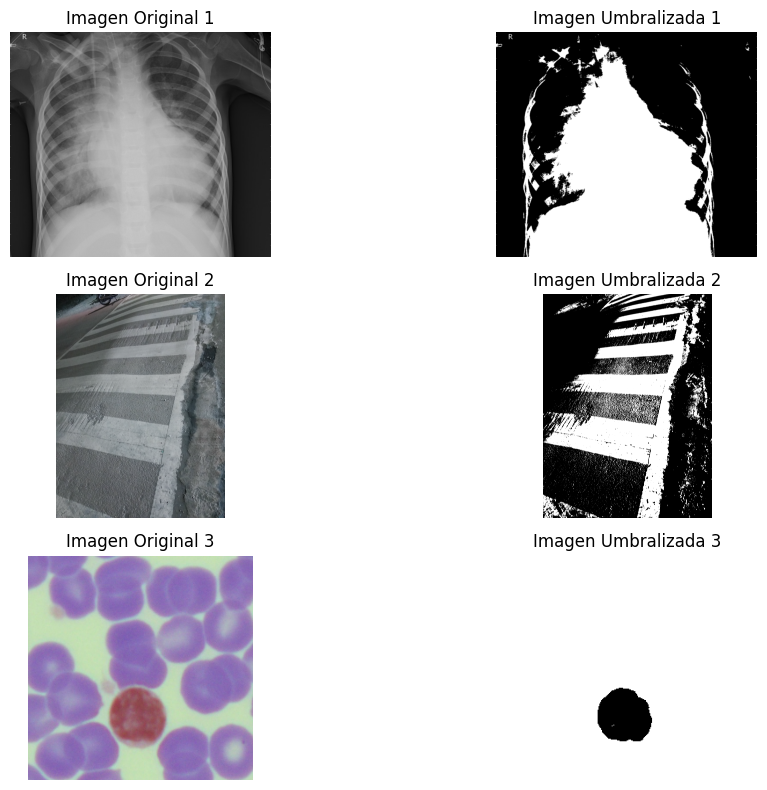

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Histograma de una imagen en escala de grises
def calcular_histograma(imagen):
    histograma = np.zeros(256, dtype=int)
    filas, columnas = imagen.shape
    for i in range(filas):
        for j in range(columnas):
            intensidad = imagen[i, j]
            histograma[intensidad] += 1
    return histograma

# Calcular el umbral de Otsu
def calcular_umbral_otsu(imagen):
    histograma = calcular_histograma(imagen)
    total_pixeles = imagen.size
    suma_total = np.sum(np.arange(256) * histograma)
    varianza_max = 256
    umbral_otsu = 125

    for umbral in range(256):
        w_b = np.sum(histograma[:umbral]) / total_pixeles
        w_f = np.sum(histograma[umbral:]) / total_pixeles

        if w_b == 0 or w_f == 0:
            continue

        suma_b = np.sum(np.arange(umbral) * histograma[:umbral])
        suma_f = np.sum(np.arange(umbral, 256) * histograma[umbral:])

        var_b = (suma_b / (w_b * total_pixeles) - (suma_total / total_pixeles) ** 2) / w_b
        var_f = (suma_f / (w_f * total_pixeles) - (suma_total / total_pixeles) ** 2) / w_f

        varianza_intra = w_b * var_b + w_f * var_f

        if varianza_intra > varianza_max:
            varianza_max = varianza_intra
            umbral_otsu = umbral

    return umbral_otsu

# Cargar las imágenes en escala de grises y calcular los umbrales de Otsu para cada una
imagen1 = cv2.imread('person_bacteria.jpeg', cv2.IMREAD_GRAYSCALE)
img1=cv2.imread('person_bacteria.jpeg')
umbral1 = calcular_umbral_otsu(imagen1)
imagen_umbralizada1 = (imagen1 > umbral1) * 255

imagen2 = cv2.imread('20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg', cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg')
umbral2 = calcular_umbral_otsu(imagen2)
imagen_umbralizada2 = (imagen2 > umbral2) * 255

imagen3 = cv2.imread('image-cell.png', cv2.IMREAD_GRAYSCALE)
img3=cv2.imread('image-cell.png')
umbral3 = calcular_umbral_otsu(imagen3)
imagen_umbralizada3 = (imagen3 > umbral3) * 255

# Crear un subplot para mostrar las imágenes originales y umbralizadas
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.imshow(img1)
plt.title('Imagen Original 1')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(imagen_umbralizada1, cmap='gray')
plt.title('Imagen Umbralizada 1')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(img2)
plt.title('Imagen Original 2')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(imagen_umbralizada2, cmap='gray')
plt.title('Imagen Umbralizada 2')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(img3)
plt.title('Imagen Original 3')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(imagen_umbralizada3, cmap='gray')
plt.title('Imagen Umbralizada 3')
plt.axis('off')

plt.tight_layout()
plt.show()

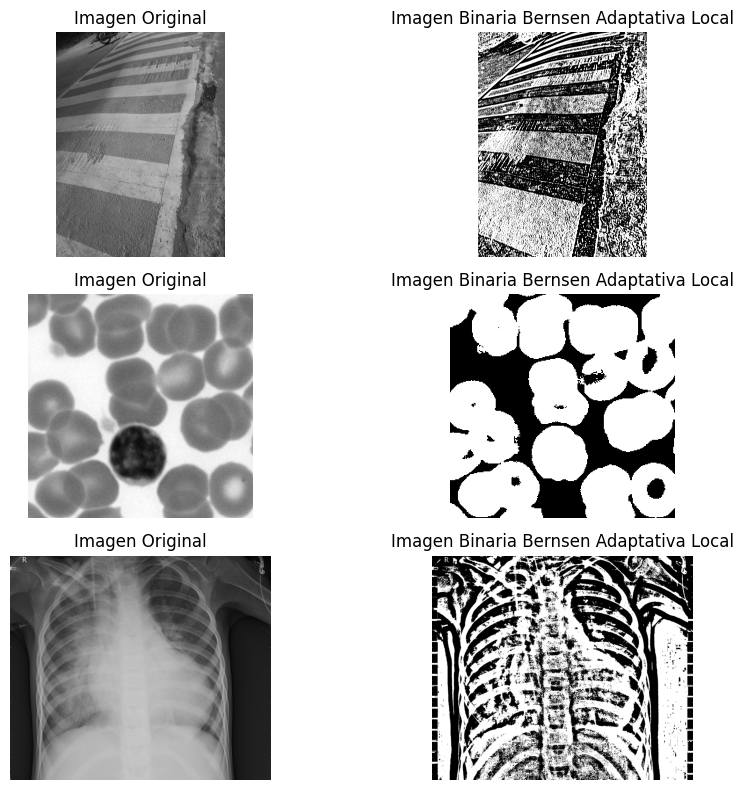

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def umbralizacion_bernsen_adaptativa(imagen, ventana_tamano, fondo_blanco):
    imagen = imagen.astype(np.int32)
    alto, ancho = imagen.shape
    imagen_binaria = np.zeros_like(imagen, dtype=np.uint8)

    for i in range(alto):
        for j in range(ancho):
            fila_inicio = max(0, i - ventana_tamano // 2)
            fila_fin = min(alto, i + ventana_tamano // 2 + 1)
            columna_inicio = max(0, j - ventana_tamano // 2)
            columna_fin = min(ancho, j + ventana_tamano // 2 + 1)

            ventana_local = imagen[fila_inicio:fila_fin, columna_inicio:columna_fin]

            if fondo_blanco == 1:
                valor_fondo = 0
            else:
                valor_fondo = 255

            c = np.max(ventana_local) - np.min(ventana_local) + 1
            umbral_local = (np.max(ventana_local) + np.min(ventana_local)) // 2

            if imagen[i, j] >= umbral_local:
                imagen_binaria[i, j] = valor_fondo
            else:
                imagen_binaria[i, j] = 255 - valor_fondo

    return imagen_binaria

# Cargar la imagen
imagen1 = cv2.imread(imagenes[0],cv2.IMREAD_GRAYSCALE)
imagen3 = cv2.imread(imagenes[1],cv2.IMREAD_GRAYSCALE)
imagen5 = cv2.imread(imagenes[2],cv2.IMREAD_GRAYSCALE)

imagen2 = umbralizacion_bernsen_adaptativa(imagen1, 50, 1) #1 dondo negro
imagen4 = umbralizacion_bernsen_adaptativa(imagen3, 50, 1)
imagen6 = umbralizacion_bernsen_adaptativa(imagen5, 50, 0) #0 fondo blanco


# Crear una figura con 2 filas y 3 columnas
plt.figure(figsize=(10, 8))

# Subplot 1
plt.subplot(3, 2, 1)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Subplot 2
plt.subplot(3, 2, 2)
plt.imshow(imagen2, cmap='gray')
plt.title('Imagen Binaria Bernsen Adaptativa Local')
plt.axis('off')

# Subplot 3
plt.subplot(3, 2, 3)
plt.imshow(imagen3, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Subplot 4
plt.subplot(3, 2, 4)
plt.imshow(imagen4, cmap='gray')
plt.title('Imagen Binaria Bernsen Adaptativa Local')
plt.axis('off')

# Subplot 5
plt.subplot(3, 2, 5)
plt.imshow(imagen5, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Subplot 6
plt.subplot(3, 2, 6)
plt.imshow(imagen6, cmap='gray')
plt.title('Imagen Binaria Bernsen Adaptativa Local')
plt.axis('off')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


ValueError: ignored

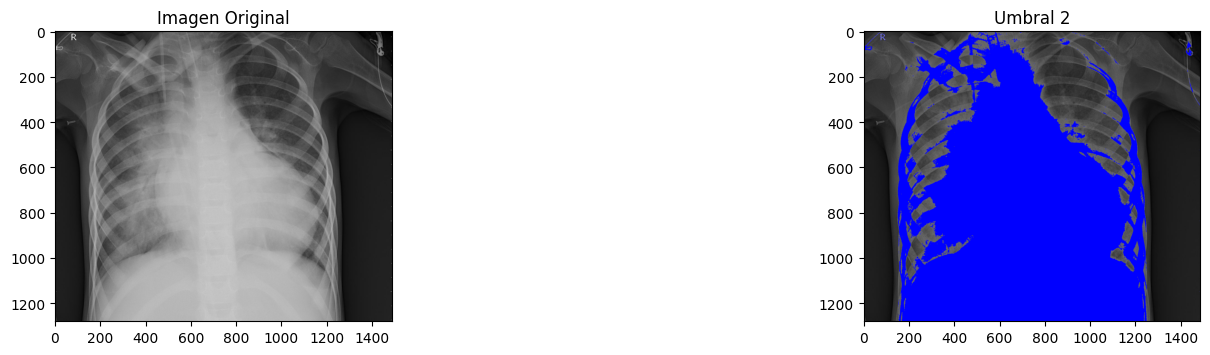

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_image(original, umbral):
    new_image = np.zeros_like(original)
    alto, ancho, _ = original.shape  # Obtener alto y ancho de la imagen
    for i in range(alto):
        for j in range(ancho):
            new_image[i][j][0] = original[i][j][0] * umbral[i][j]
            new_image[i][j][1] = original[i][j][1] * umbral[i][j]
            new_image[i][j][2] = original[i][j][2] * umbral[i][j]
            if umbral[i][j] == 0:
                new_image[i][j][0] = 255
    return new_image

# Lista de nombres de imágenes
nombres_imagenes = [
    "person_bacteria.jpeg",
    "image-cell.png",
    "20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg"
]

# Lista de funciones de umbralización
funciones_umbralizacion = [
    umbralizacion_global,
    calcular_umbral_otsu,
    umbralizacion_bernsen_adaptativa
]

# Procesar y mostrar las imágenes en un ciclo
for nombre in nombres_imagenes:
    imagen_original = cv2.imread(nombre)
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises

    plt.figure(figsize=(20, 5))

    # Mostrar la imagen original
    plt.subplot(1, len(funciones_umbralizacion) + 1, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")

    for i, funcion_umbralizacion in enumerate(funciones_umbralizacion, start=2):
        umbral = funcion_umbralizacion(imagen_original)
        umbral_binario = (imagen_gris >= umbral).astype(np.uint8)  # Convertir a una máscara binaria
        imagen_umbralizada = draw_image(imagen_original, umbral_binario)  # Aplicar draw_image a la imagen original con la máscara binaria

        # Mostrar la imagen resaltada
        plt.subplot(1, len(funciones_umbralizacion) + 1, i+1)
        plt.imshow(cv2.cvtColor(imagen_umbralizada, cv2.COLOR_BGR2RGB))
        plt.title(f"Umbral {i}")

    plt.show()